<a href="https://colab.research.google.com/github/Dana-Afazeli/Yektanet-Data-science/blob/main/Yektanet_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yektanet Data analysis task 1
In this task we analyze a data sample gathered from an online shop in a 4 days span. 


## problem description
provided data has the following columns:


*   Time of event
*   Type of event
*   Product ID
*   Category ID
*   Brand
*   Price
*   User ID



## objective
We hope to be answer the following questions:


1.   What is the field of work of this shop? [answer](#answer1)
2.   Assuming that this shop wants to run a 1 hours sale for 10 goods, which goods do you suggest for the sale? What is the best time interval for this sale? [answer](#answer2)
3.   What are the "Luxury" goods of this shop?
4.   What company has better branding?



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the data and get a feeling of how it looks like

In [ ]:
df = pd.read_csv("./drive/MyDrive/datasets/yektanet_tasks/task1_dataset.csv", index_col = False)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717
1,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250
2,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854
3,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217
4,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880


get some feeling about the columns and attributes

In [ ]:
# just a util descriptive function
def my_describe(df):
  print(df.describe(),"\n\n")
  print(df.info())
  N = df.shape[0]
  print("\n\nnumber and percentage of NaN values in each column:\n")
  for col in df.columns:
    nulls = df[col].isnull().sum()
    print(col, ":" ,nulls, ",", round((nulls/N) * 100, 2))

my_describe(df)

         product_id   category_id         price       user_id
count  3.820450e+06  3.820450e+06  3.820450e+06  3.820450e+06
mean   7.303264e+06  2.056139e+18  3.365825e+02  5.315324e+08
std    1.001141e+07  1.595066e+16  3.859731e+02  1.697407e+07
min    1.001588e+06  2.053014e+18  0.000000e+00  1.842654e+08
25%    1.004872e+06  2.053014e+18  8.984000e+01  5.155822e+08
50%    2.900022e+06  2.053014e+18  1.904500e+02  5.272590e+08
75%    8.500086e+06  2.053014e+18  4.247200e+02  5.485322e+08
max    5.490001e+07  2.172371e+18  2.574070e+03  5.568893e+08 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3820450 entries, 0 to 3820449
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
dtypes: float64(1), int64(3), object(4)
memory 

First off, the lowest price is 0! we will take care of this later when we visualize the numerical data.

Second, the NaN values. since the percentage of Na entries in the data is not that large (less than say 30%), we wont delete any column. we also wont delete any row with Na entries unless both category code and brand are Na in which case the event does not really give us any info.

In [ ]:
# drop Na values
df_no_Na = df.dropna(subset = ['category_code', 'brand'], how='all')
my_describe(df_no_Na)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3718768 entries, 0 to 3820449
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 255.3+ MB


number and percentage of NaN values in each column:

event_time : 0 ,  0.0
event_type : 0 ,  0.0
product_id : 0 ,  0.0
category_id : 0 ,  0.0
category_code : 269820 ,  7.26
brand : 254189 ,  6.84
price : 0 ,  0.0
user_id : 0 ,  0.0


<a name="answer1"></a>
## Answer 1
Now that we have a clean data, lest tackle the first question. we start analysing our dataset's entries. We start by seeing the different values of categorical columns:

In [ ]:
### categorical analysis ###
# take a copy of the main data to modify
category_df = df_no_Na.copy()

# analyzing category_code
categories = df_no_Na.category_code.unique()
print("\n\nthere are {0} categories and some of them are:".format(len(categories)), categories[:10])

# clean the category column with: appliancees, furniture, computers and ...
def clean_category(row):
  cat = str(row.category_code)
  cat = cat[:cat.find('.')]
  return cat

category_df['category_code'] = category_df.apply(lambda row: clean_category(row), axis=1)
categories = category_df.category_code.unique()
print("\n\nthere are {0} categories after cleaning and they are:".format(len(categories)), categories)



there are 124 categories and some of them are: ['appliances.environment.water_heater' 'furniture.living_room.sofa'
 'computers.notebook' 'electronics.smartphone' 'computers.desktop' nan
 'apparel.shoes.keds' 'appliances.kitchen.microwave'
 'furniture.bedroom.bed' 'electronics.video.tv']


there are 14 categories after cleaning and they are: ['appliances' 'furniture' 'computers' 'electronics' 'na' 'apparel'
 'construction' 'auto' 'kids' 'sport' 'accessories' 'medicine'
 'stationery' 'country_yard']


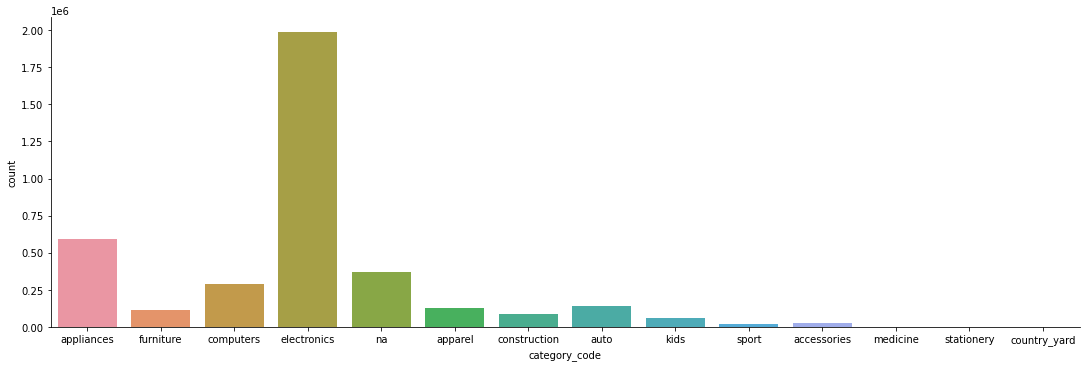

In [ ]:
sns.catplot(x = "category_code", kind="count", data=category_df, aspect = 3)


Here we can answer our first question.
As its supported by the plot above, this shop sells different types of product. from furniture to electronics to sport accessories to even medicine! so its really something like amazon or digikala. But as one can verify, the majority of traffic on this website is around electronic products. So if we were to guess a field of work for this shop, that would definitely be electronic products.

<a name="answer2"></a>
## Answer 2
Now lets approach the second question. To asnwer this question we essentially need to know when and what products are "bought" more in order to maximize the expected price of the product that we want to put on sale.
So all we have to do, is to plot the "buy" actions (maybe add "cart" actions as well) with respect to the time of the corresponding events:

In [ ]:
# plotting "buy" with respect to time of transactions
buy_df = df_no_Na.loc[df_no_Na['event_type'] == 'purchase']
buy_df['event_time']

126        2019-10-01 00:02:14 UTC
235        2019-10-01 00:04:37 UTC
321        2019-10-01 00:07:07 UTC
416        2019-10-01 00:09:26 UTC
434        2019-10-01 00:09:54 UTC
                    ...           
3820185    2019-10-05 01:31:47 UTC
3820198    2019-10-05 01:31:51 UTC
3820240    2019-10-05 01:31:59 UTC
3820368    2019-10-05 01:32:25 UTC
3820426    2019-10-05 01:32:39 UTC
Name: event_time, Length: 69961, dtype: object